# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

eth = pd.read_csv('1-trimestre-2024-ETH.csv')

# Limpieza de datos

# 1. Convertir las columnas a datos númericos
# Convertir la columna 'Fecha' a formato fecha

eth['Fecha'] = pd.to_datetime(eth['Fecha'], format='%b %d, %Y')

# Convertir las columnas de precios a tipo float y quitar el signo de dólar y las comas

columnas_precio = ['Abrir', 'Alto', 'Bajo', 'Cerrar', 'Volumen', 'Cap. de Mercado']
eth[columnas_precio] = eth[columnas_precio].replace('[\$,]', '', regex=True).astype(float)

# * El parámetro regex=True en el método replace() indica que el patrón que estás pasando como primer argumento es una expresión regular.
# * Las expresiones regulares son patrones utilizados para buscar y reemplazar texto dentro de cadenas de caracteres.

# * En el contexto de replace(), cuando regex=True, el primer argumento se interpreta como una expresión regular.
# * Esto significa que puedes usar patrones más complejos para encontrar y reemplazar texto en las cadenas.

columnas_millones = ['Volumen', 'Cap. de Mercado']
eth[columnas_millones] = eth[columnas_millones] / 1000000

# Actualizamos los nombres de las columnas
eth = eth.rename(columns={'Abrir': 'Apertura', 'Alto': 'Max.', 'Bajo': 'Min.', 'Cerrar': 'Cierre', 'Volumen': 'Volumen(MM)', 'Cap. de Mercado': 'Cap.Mercado(MM)'})
print(eth)

        Fecha  Apertura     Max.     Min.   Cierre   Volumen(MM)  \
0  2024-03-01   3341.97  3452.63  3341.85  3435.05  16880.101987   
1  2024-02-29   3386.80  3518.97  3303.91  3341.92  28469.171094   
2  2024-02-28   3243.89  3485.45  3201.58  3385.70  32885.894265   
3  2024-02-27   3178.40  3287.96  3167.83  3244.52  21090.315368   
4  2024-02-26   3112.53  3197.38  3037.95  3178.99  17504.464351   
5  2024-02-25   2992.37  3117.43  2984.39  3112.70  14620.450464   
6  2024-02-24   2921.96  3003.20  2907.70  2992.39  10701.688842   
7  2024-02-23   2970.14  2991.33  2906.58  2921.66  12822.717059   
8  2024-02-22   2969.60  3030.67  2907.11  2971.01  18058.908246   
9  2024-02-21   3015.65  3017.19  2875.42  2970.36  18897.136867   
10 2024-02-20   2944.11  3031.52  2879.90  3013.50  20341.598470   
11 2024-02-19   2881.30  2983.37  2860.26  2943.57  15163.110589   
12 2024-02-18   2786.71  2892.84  2767.91  2879.00  23355.830478   
13 2024-02-17   2803.74  2805.13  2724.39  2786.

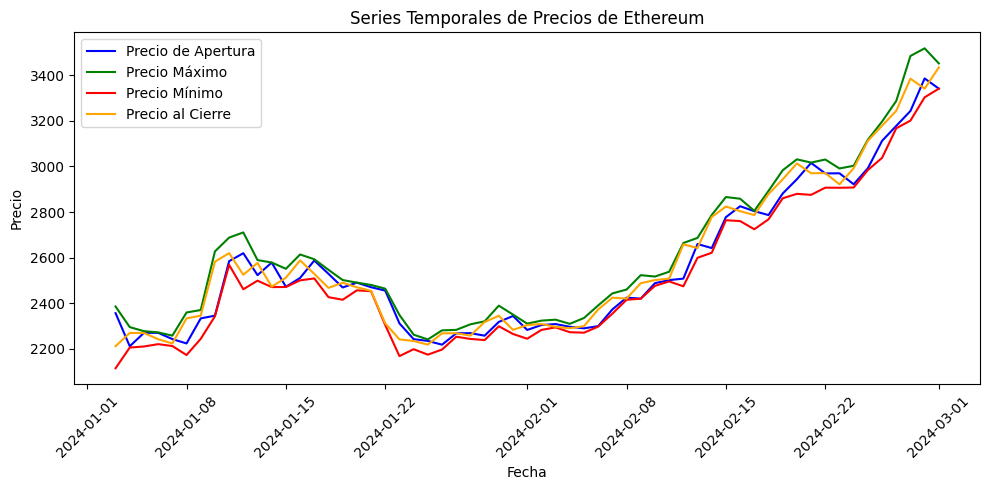

In [3]:
# - ANÁLISIS DESCRIPTIVO

# Lista de columnas para las cuales deseas calcular las estadísticas descriptivas
columnas_seleccionadas = ['Apertura', 'Max.', 'Min.', 'Cierre', 'Volumen(MM)', 'Cap.Mercado(MM)']

# Calcular estadísticas descriptivas solo para las columnas seleccionadas
estadisticas_descriptivas = eth[columnas_seleccionadas].describe()
#print(estadisticas_descriptivas)

# Matriz de correlación
matrix = eth[['Apertura', 'Max.', 'Min.', 'Cierre', 'Volumen(MM)', 'Cap.Mercado(MM)']]
correlacion = matrix.corr()

# 2. Tendencias temporales:

# Graficar las series temporales de precios
plt.figure(figsize=(10, 5))

plt.plot(eth['Fecha'], eth['Apertura'], label='Precio de Apertura', color='blue')
plt.plot(eth['Fecha'], eth['Max.'], label='Precio Máximo', color='green')
plt.plot(eth['Fecha'], eth['Min.'], label='Precio Mínimo', color='red')
plt.plot(eth['Fecha'], eth['Cierre'], label='Precio al Cierre', color='orange')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Series Temporales de Precios de Ethereum')
plt.legend()

plt.xticks(rotation=45)   # Rotar los ticks del eje x para mejorar la legibilidad

plt.tight_layout()
plt.show()

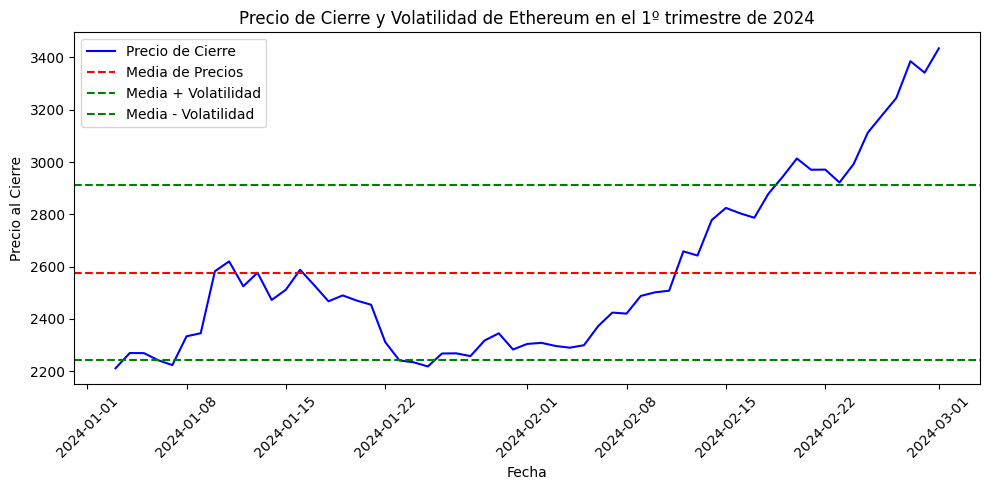

In [4]:
# Ahora observaremos la volatilidad de los precios de ETH durante el primer trimestre de 2024

# Calcular la media de precios y la volatilidad (desviación estándar)
media_precios = eth['Cierre'].mean()
volatilidad = eth['Cierre'].std()


plt.figure(figsize=(10, 5))

# Graficar la media de precios
plt.plot(eth['Fecha'], eth['Cierre'], color='blue', label='Precio de Cierre')

# Graficar la volatilidad como una línea horizontal
plt.axhline(y=media_precios, linestyle='--', color='red', label='Media de Precios')
plt.axhline(y=media_precios + volatilidad, linestyle='--', color='green', label='Media + Volatilidad')
plt.axhline(y=media_precios - volatilidad, linestyle='--', color='green', label='Media - Volatilidad')

# Agregar etiquetas y título al gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio al Cierre')
plt.title('Precio de Cierre y Volatilidad de Ethereum en el 1º trimestre de 2024')

# Agregar una leyenda al gráfico
plt.legend()

# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

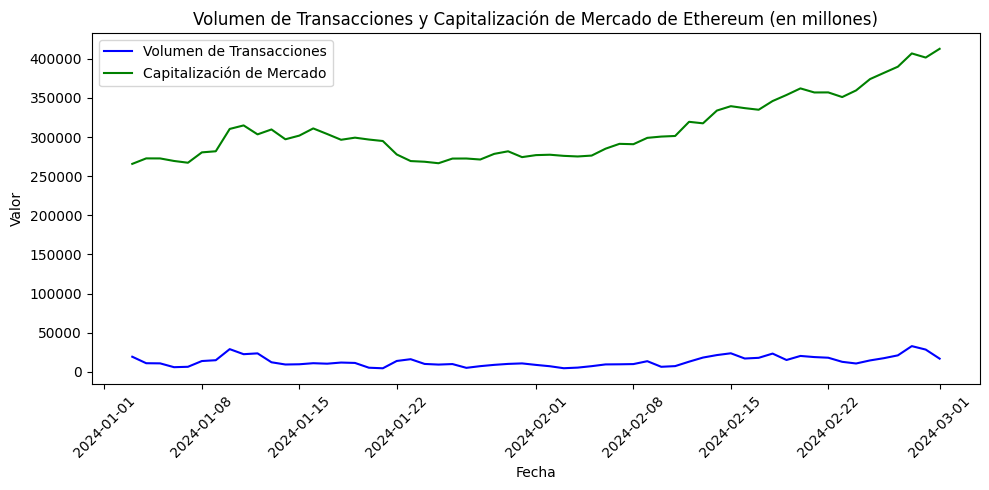

In [5]:
# Relación entre el Volumen y la Capitalización de mercado ETH 2024

plt.figure(figsize=(10, 5))

plt.plot(eth['Fecha'], eth['Volumen(MM)'], color='blue', label='Volumen de Transacciones')
plt.plot(eth['Fecha'], eth['Cap.Mercado(MM)'], color='green', label='Capitalización de Mercado')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Volumen de Transacciones y Capitalización de Mercado de Ethereum (en millones)')
plt.legend()

plt.xticks(rotation=45)     # Rotar los ticks del eje x para mejorar la legibilidad

plt.tight_layout()
plt.show()


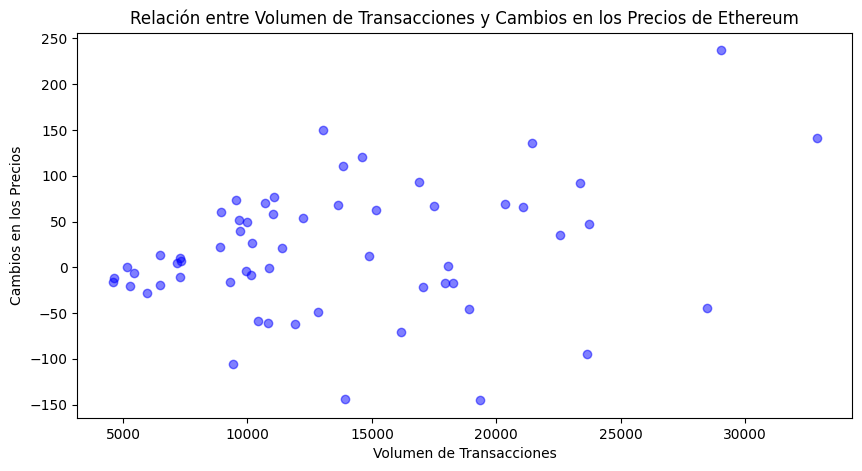

Correlación entre Volumen de Transacciones y Cambios en los Precios: 0.2817967021989163


In [6]:
# Gráfico de dispersión entre el volumen de transacciones y los cambios en los precios
plt.figure(figsize=(10, 5))
plt.scatter(eth['Volumen(MM)'], eth['Cierre'] - eth['Apertura'], color='blue', alpha=0.5)
plt.xlabel('Volumen de Transacciones')
plt.ylabel('Cambios en los Precios')
plt.title('Relación entre Volumen de Transacciones y Cambios en los Precios de Ethereum')
plt.show()

# Calcular la correlación entre el volumen de transacciones y los cambios en los precios
corr = eth['Volumen(MM)'].corr(eth['Cierre'] - eth['Apertura'])
print("Correlación entre Volumen de Transacciones y Cambios en los Precios:", corr)